In [1]:
from sklearn.datasets import make_blobs

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression

In [2]:
X, y = make_blobs(centers=2, random_state=42)

In [5]:
y.shape

(100,)

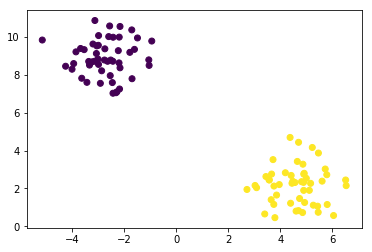

In [3]:
plt.scatter(X[:, 0], X[:, 1], c= y)

In [17]:
class CustomLogisticRegression:
    
    def __init__(self, lr=0.01, iters=20):
        self.__lr = lr
        self.__iters = iters
    
    def fit(self, X, y):
        
        self.__y = y.reshape(-1, 1)
        X_mod = np.hstack([np.ones([len(X), 1]), X])
        self.__X = X_mod
        
        self.__theta = np.zeros([X_mod.shape[1], 1])
        
        err = []
        for i in range(self.__iters):
            err.append(self.error())
            self.gradient_accend()
            
        self.theta_ = self.__theta 
            
        return err
        
    def gradient_accend(self):
        delta_theta = self.gradient()
        self.__theta -= delta_theta
        
    def gradient(self):
        yh = self.hypothesis(self.__X)
        diff = (yh - self.__y)
        
        return np.dot(self.__X.T, diff) * self.__lr
        
    def hypothesis(self, X):
        prod = np.dot(X, self.__theta)
        return 1 / (1 + np.exp(-prod))
        
    def error(self):
        yh = self.hypothesis(self.__X)
        ya = self.__y
        ll = ya*np.log(yh) + (1-ya)*np.log(1-yh)
        return -np.mean(ll)
    
    def predict(self, X):
        X_mod = np.hstack([np.ones([len(X), 1]), X])
        yh = self.hypothesis(X_mod)
        
        return (yh > .5).astype(int).flatten()
    
    def score(self, X, y):
        yp = self.predict(X)
        np.mean(yp == y)
        
        
        
        

In [18]:
model = CustomLogisticRegression()

In [19]:
err = model.fit(X, y)

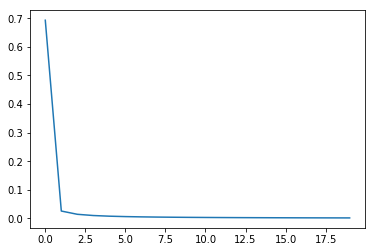

In [20]:
plt.plot(err)

In [21]:
model.theta_

array([[ 0.10576513],
       [ 2.23511125],
       [-1.3463527 ]])